In [1]:
import pandas as pd
import numpy as np
from math import *
import warnings
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/home/sudharshan/Documents/uber.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.count()


Unnamed: 0           200000
key                  200000
fare_amount          200000
pickup_datetime      200000
pickup_longitude     200000
pickup_latitude      200000
dropoff_longitude    199999
dropoff_latitude     199999
passenger_count      200000
dtype: int64

In [6]:
df = df.drop(["Unnamed: 0","key"],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [8]:
df=df.dropna()

In [137]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"], errors="coerce")

In [138]:
df["pickup_datetime"].dt.year

0         2015
1         2009
2         2009
3         2009
4         2014
          ... 
199995    2012
199996    2014
199997    2009
199998    2015
199999    2010
Name: pickup_datetime, Length: 199999, dtype: int64

In [139]:
df["YEAR"]=df["pickup_datetime"].dt.year
df["Month"]=df["pickup_datetime"].dt.month
df["day"]=df["pickup_datetime"].dt.day
df["hour"]=df["pickup_datetime"].dt.hour

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float64            
 1   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float64            
 3   pickup_latitude    199999 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    199999 non-null  int64              
 7   YEAR               199999 non-null  int64              
 8   Month              199999 non-null  int64              
 9   day                199999 non-null  int64              
 10  hour               199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(5)
memory usage: 18.3 MB


In [141]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,YEAR,Month,day,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [142]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
YEAR                 0
Month                0
day                  0
hour                 0
dtype: int64

In [143]:
def distcal(long1,lat1,long2,lat2):
    distance=[]
    for i in range(len(long1)):
        lo1,la1,lo2,la2=map(radians,[long1[i],lat1[i],long2[i],lat2[i]])
        dist_long=lo2-lo1
        dist_lat=la2-la1
        a=sin(dist_lat/2)**2+cos(la1)*cos(la2)*sin(dist_long)**2
        c=2*asin(sqrt(a))*6371
        distance.append(c)
    return distance

In [144]:
df["distance_km"]= distcal(df["pickup_longitude"].to_numpy(),df["pickup_latitude"].to_numpy(),df["dropoff_longitude"].to_numpy(),df["dropoff_latitude"].to_numpy())

In [145]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,YEAR,Month,day,hour,distance_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,1.683912
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,2.458136
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,7.985527
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,2.290057
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,8.318261


In [146]:
def find_outliers(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [147]:
outliers = find_outliers(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))

number of outliers:17166
max outlier value:499.0
min outlier value:-52.0


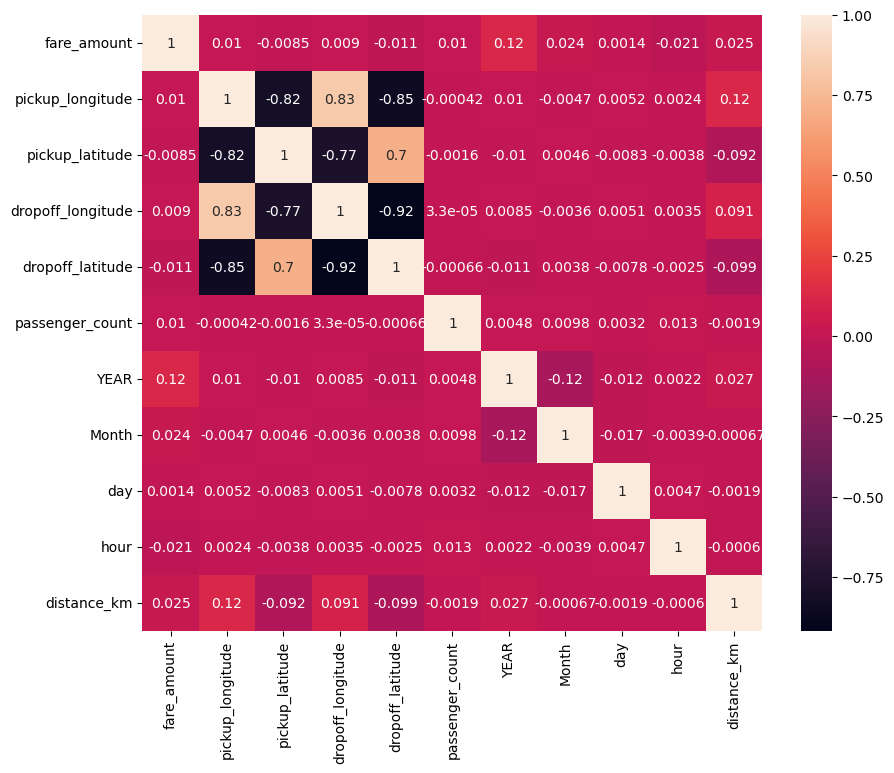

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [150]:
x=df[["YEAR","day","Month","hour","distance_km"]]
y=df["fare_amount"]

In [151]:
sc = StandardScaler()

In [152]:
x = sc.fit_transform(x)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [161]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred=model.predict(x_test)

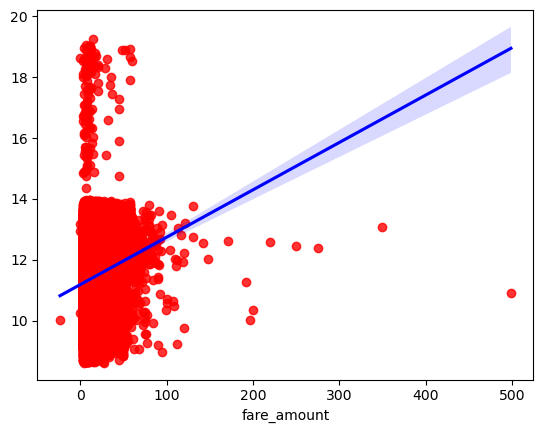

In [163]:
sns.regplot(x=y_test,y=y_pred,color="red", line_kws={"color" : "blue"})
plt.show()

In [157]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 5.969834395031093
Mean squared error 101.2477687886505
Root mean squared error 10.062195028354921


In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [169]:
y_pred = model.predict(x_test)

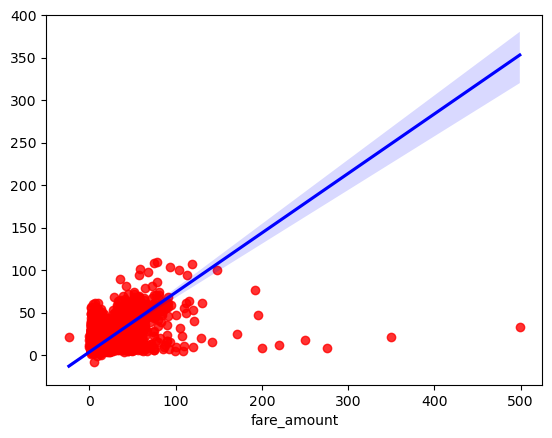

In [170]:
sns.regplot(x=y_test,y=y_pred,color="red", line_kws={"color" : "blue"})
plt.show()

In [171]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 2.5823402140108227
Mean squared error 33.86455725089693
Root mean squared error 5.819326185298168
